In [188]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import datetime as dt
from itertools import product
import warnings
warnings.filterwarnings('ignore')
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
from pickle import dump

In [189]:
df = pd.read_csv("online_retail.csv")
df.head(5)

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [190]:
df.tail(5)

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
541904,541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France
541908,541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,12/9/2011 12:50,4.95,12680.0,France


In [191]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   index        541909 non-null  int64  
 1   InvoiceNo    541909 non-null  object 
 2   StockCode    541909 non-null  object 
 3   Description  540455 non-null  object 
 4   Quantity     541909 non-null  int64  
 5   InvoiceDate  541909 non-null  object 
 6   UnitPrice    541909 non-null  float64
 7   CustomerID   406829 non-null  float64
 8   Country      541909 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 37.2+ MB


In [192]:
df.describe()

,index,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,541909.000000,406829.000000
mean,270954.000000,9.552250,4.611114,15287.690570
std,156435.797851,218.081158,96.759853,1713.600303
min,0.000000,-80995.000000,-11062.060000,12346.000000
25%,135477.000000,1.000000,1.250000,13953.000000
50%,270954.000000,3.000000,2.080000,15152.000000
75%,406431.000000,10.000000,4.130000,16791.000000
max,541908.000000,80995.000000,38970.000000,18287.000000


In [193]:
df.isnull().sum()

index               0
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [194]:
df.duplicated().sum()

0

In [195]:
len(df["Description"].unique())

4224

In [196]:
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

Top 15 sản phẩm bán chạy

In [197]:
Most_buyed_product = df.groupby(by='Description').agg({'Quantity':'sum'}).reset_index().sort_values(by="Quantity", ascending= False).head(15)
Most_buyed_product

,Description,Quantity
4009,WORLD WAR 2 GLIDERS ASSTD DESIGNS,53847
1866,JUMBO BAG RED RETROSPOT,47363
244,ASSORTED COLOUR BIRD ORNAMENT,36381
2740,POPCORN HOLDER,36334
2395,PACK OF 72 RETROSPOT CAKE CASES,36039
3918,WHITE HANGING HEART T-LIGHT HOLDER,35317
2803,RABBIT NIGHT LIGHT,30680
2161,MINI PAINT SET VINTAGE,26437
2361,PACK OF 12 LONDON TISSUES,26315
2393,PACK OF 60 PINK PAISLEY CAKE CASES,24753


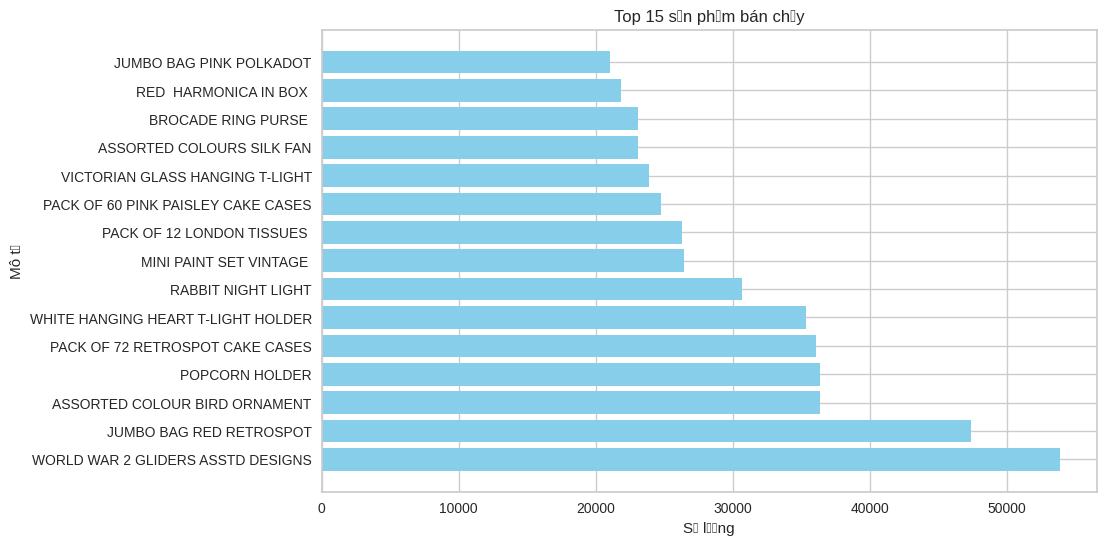

In [198]:
plt.figure(figsize=(10,6))
plt.barh(data = Most_buyed_product, y='Description', width='Quantity', color='skyblue')
plt.xlabel("Số lượng")
plt.ylabel("Mô tả")
plt.title("Top 15 sản phẩm bán chạy")
plt.show()

# Top sản phẩm theo quốc gia

In [199]:
Top_products_countrywise = df.groupby(by="Country").agg({"Quantity":"sum"}).reset_index().sort_values(by="Quantity", ascending=False)
Top_products_countrywise

,Country,Quantity
36,United Kingdom,4263829
24,Netherlands,200128
10,EIRE,142637
14,Germany,117448
13,France,110480
0,Australia,83653
32,Sweden,35637
33,Switzerland,30325
31,Spain,26824
20,Japan,25218


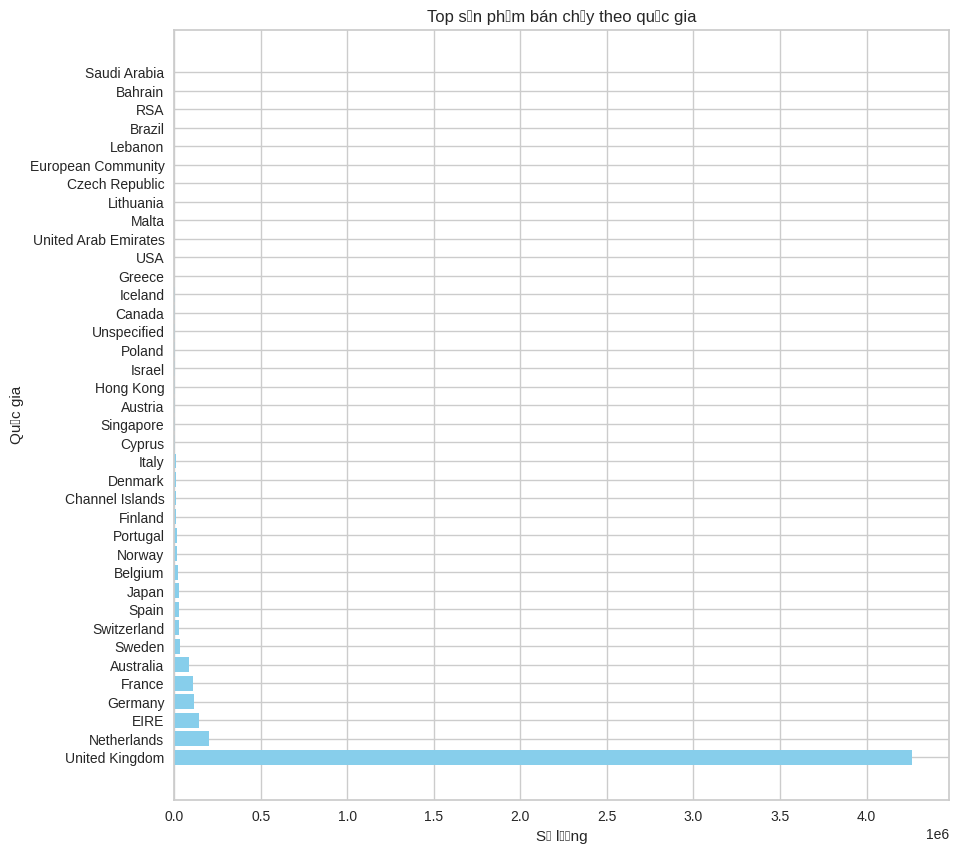

In [200]:
plt.figure(figsize=(10, 10))
plt.barh(data=Top_products_countrywise, y='Country', width='Quantity', color='skyblue')
plt.xlabel("Số lượng")
plt.ylabel("Quốc gia")
plt.title("Top sản phẩm bán chạy theo quốc gia")
plt.show()

# Số lượng loại sản phẩm trên từng quốc gia

In [201]:
product_per_country = df.groupby(['Country','Description']).agg({'Quantity': 'sum'}).reset_index()
product_per_country

,Country,Description,Quantity
0,Australia,DOLLY GIRL BEAKER,200
1,Australia,I LOVE LONDON MINI BACKPACK,4
2,Australia,10 COLOUR SPACEBOY PEN,48
3,Australia,12 PENCIL SMALL TUBE WOODLAND,384
4,Australia,12 PENCILS TALL TUBE POSY,252
...,...,...,...
20171,Unspecified,WRAP POPPIES DESIGN,25
20172,Unspecified,WRAP SUKI AND FRIENDS,25
20173,Unspecified,WRAP VINTAGE PETALS DESIGN,25
20174,Unspecified,WRAP WEDDING DAY,25


In [202]:
for country in product_per_country['Country'].unique():
  country_data = product_per_country[product_per_country['Country']== country].groupby(by=['Description','Country']).agg({'Quantity':'sum'}).reset_index().sort_values(by="Quantity", ascending= False).head(15)
  plt.figure(figsize=(15,10))
  plt.barh(country_data['Description'], country_data['Quantity'], color='skyblue')
  plt.xlabel('Số lượng')
  plt.ylabel('Mô tả sản phẩm')
  plt.title(f'Số lượng sản phẩm của quốc gia {country}')
  plt.show()

Output hidden; open in https://colab.research.google.com to view.

# Sản phẩm hàng đầu theo năm



In [203]:
from datetime import datetime

In [204]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['InvoiceDate_year'] = df['InvoiceDate'].dt.year
df['InvoiceDate_month'] = df['InvoiceDate'].dt.month
df['InvoiceDate_day'] = df['InvoiceDate'].dt.day
df['InvoiceDate_hour'] = df['InvoiceDate'].dt.hour

In [205]:
df.sample(5)

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate_year,InvoiceDate_month,InvoiceDate_day,InvoiceDate_hour
25090,25090,538353,21166,COOK WITH WINE METAL SIGN,96,2010-12-10 15:31:00,1.69,13798.0,United Kingdom,2010,12,10,15
21105,21105,538071,22742,MAKE YOUR OWN PLAYTIME CARD KIT,1,2010-12-09 14:09:00,5.91,NaN,United Kingdom,2010,12,9,14
309808,309808,564141,21561,DINOSAUR LUNCH BOX WITH CUTLERY,1,2011-08-23 11:47:00,2.55,17841.0,United Kingdom,2011,8,23,11
121157,121157,546739,21217,RED RETROSPOT ROUND CAKE TINS,12,2011-03-16 12:12:00,8.95,17511.0,United Kingdom,2011,3,16,12
239192,239192,558028,79190A,RETRO PLASTIC 70'S TRAY,15,2011-06-24 11:39:00,0.42,15128.0,United Kingdom,2011,6,24,11


In [206]:
df['InvoiceDate_year'].unique()

array([2010, 2011])

In [207]:
year_2010_df = df[df['InvoiceDate_year']==2010]
year_2010_df = year_2010_df.groupby(by='Description').agg({"Quantity":'sum'}).reset_index().sort_values(by="Quantity", ascending = False)
display(year_2010_df)

,Description,Quantity
2710,WORLD WAR 2 GLIDERS ASSTD DESIGNS,5195
1677,PACK OF 72 RETROSPOT CAKE CASES,4076
1166,HAND WARMER BABUSHKA DESIGN,3382
2649,WHITE HANGING HEART T-LIGHT HOLDER,3343
2386,SMALL POPCORN HOLDER,2731
...,...,...
2758,damages,-43
2757,check,-55
485,CARD HOLDER GINGHAM HEART,-99
810,Dotcom sales,-200


In [208]:
year_2011_df = df[df['InvoiceDate_year']==2011]
year_2011_df = year_2011_df.groupby(by='Description').agg({"Quantity":'sum'}).reset_index().sort_values(by="Quantity", ascending = False)
display(year_2011_df)

,Description,Quantity
3906,WORLD WAR 2 GLIDERS ASSTD DESIGNS,48652
1807,JUMBO BAG RED RETROSPOT,45237
2662,POPCORN HOLDER,36334
239,ASSORTED COLOUR BIRD ORNAMENT,34010
3816,WHITE HANGING HEART T-LIGHT HOLDER,31974
...,...,...
1087,Damaged,-7540
2715,Printing smudges/thrown away,-9058
4009,check,-11975
3646,"Unsaleable, destroyed.",-15644


Text(0.5, 1.0, 'Year 2011')

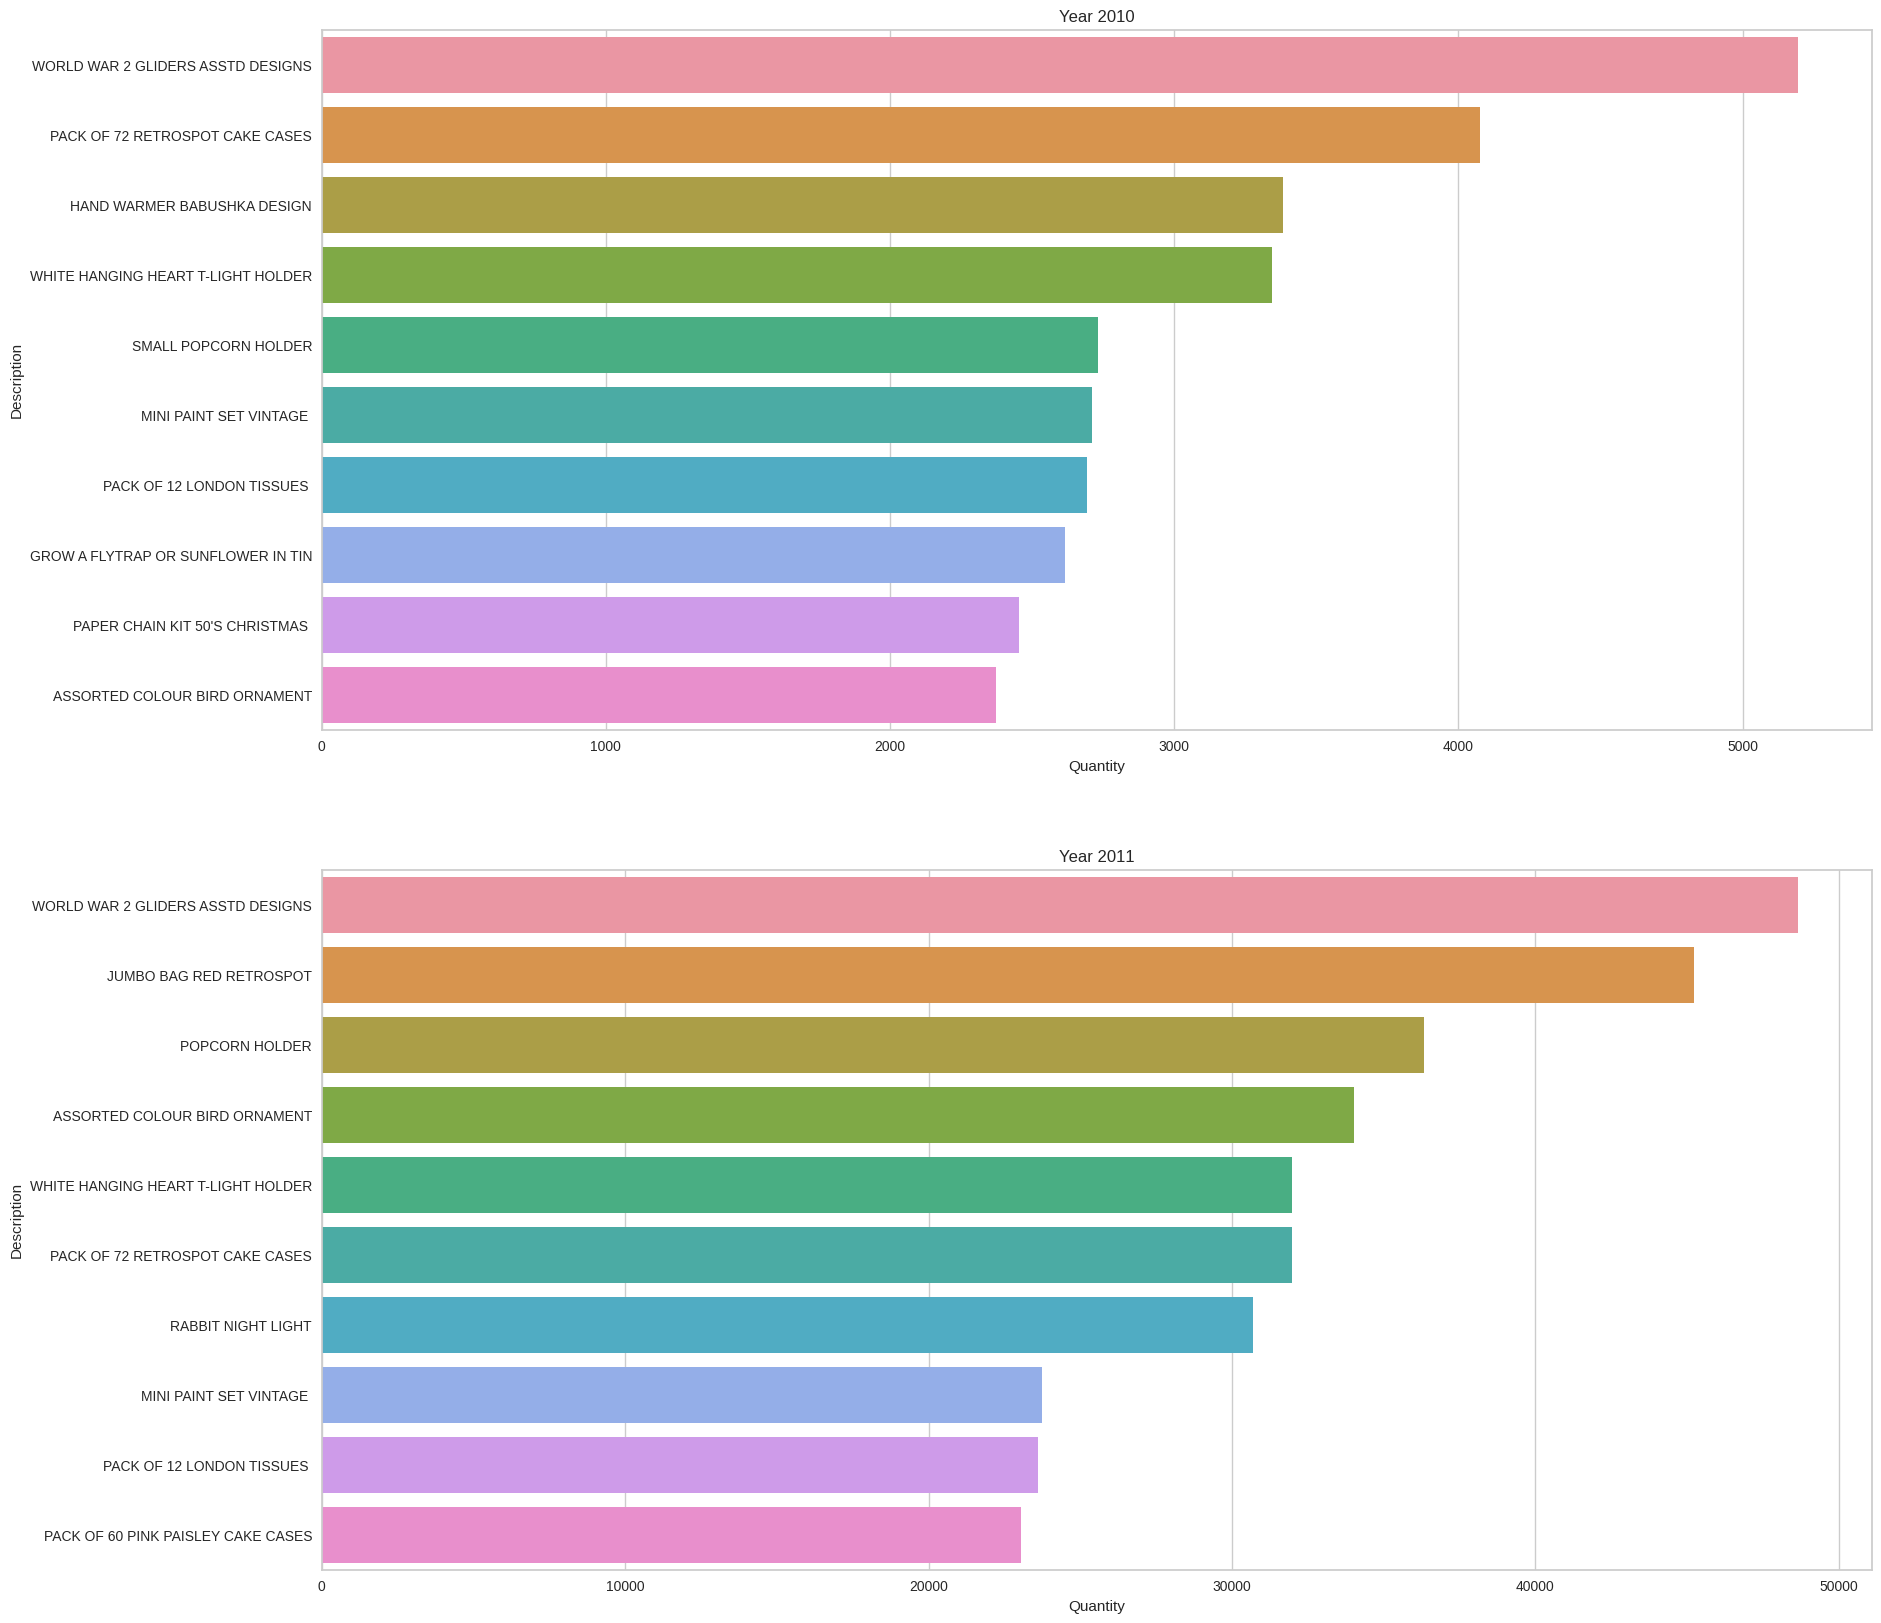

In [209]:
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(20,20))
sns.barplot(year_2010_df.head(10), x='Quantity', y='Description', ax=ax[0])
ax[0].set_title("Year 2010")
sns.barplot(year_2011_df.head(10), x='Quantity', y='Description', ax=ax[1])
ax[1].set_title("Year 2011")

# Top sản phẩm trong tháng

In [210]:
top_product_by_month = df.groupby(by='InvoiceDate_month').agg({"Quantity":"sum"}).reset_index()

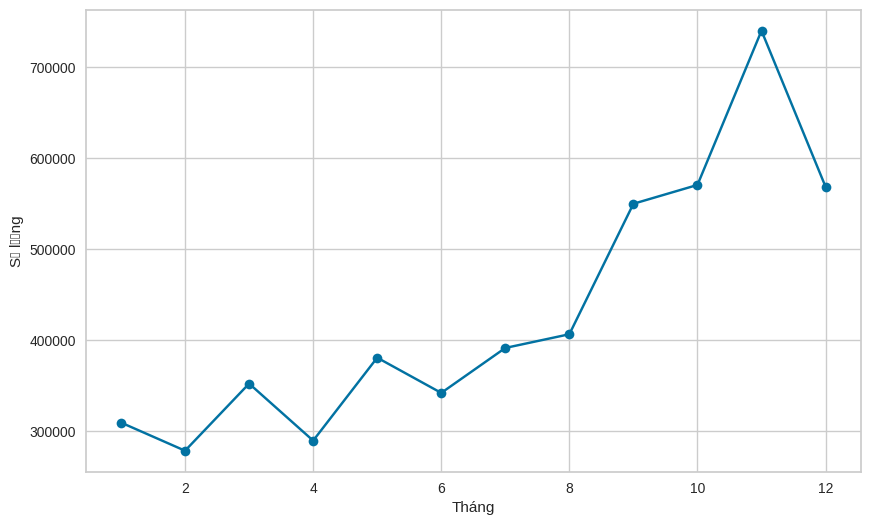

In [211]:
fig = plt.subplots(figsize=(10, 6))
plt.plot(top_product_by_month["InvoiceDate_month"], top_product_by_month["Quantity"], marker='o', linestyle='-')
plt.xlabel("Tháng")
plt.ylabel("Số lượng")
plt.show()

Top sản phẩm theo giờ

In [212]:
top_product_by_hour = df.groupby(by="InvoiceDate_hour").agg({'Quantity':'sum'}).reset_index().sort_values(by='Quantity', ascending = False)
top_product_by_hour

,InvoiceDate_hour,Quantity
6,12,823935
4,10,684416
7,13,676803
5,11,637672
9,15,609710
8,14,571549
3,9,429366
10,16,312317
2,8,158163
11,17,156331


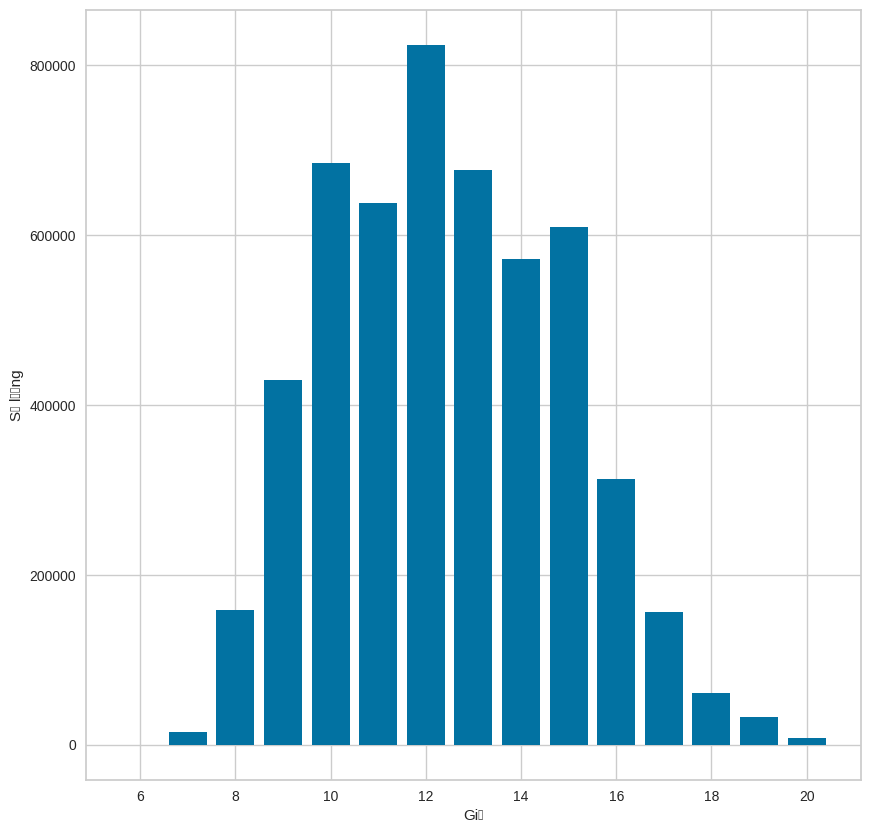

In [213]:
plt.figure(figsize=(10,10))
plt.bar(data=top_product_by_hour, x='InvoiceDate_hour', height='Quantity')
plt.xlabel('Giờ')
plt.ylabel('Số lượng')
plt.show()

# Khách hàng thường xuyên

In [214]:
most_fre_customer = df['CustomerID'].value_counts().sort_values(ascending = False).reset_index()
most_fre_customer.head(10)

,index,CustomerID
0,17841.0,7983
1,14911.0,5903
2,14096.0,5128
3,12748.0,4642
4,14606.0,2782
5,15311.0,2491
6,14646.0,2085
7,13089.0,1857
8,13263.0,1677
9,14298.0,1640


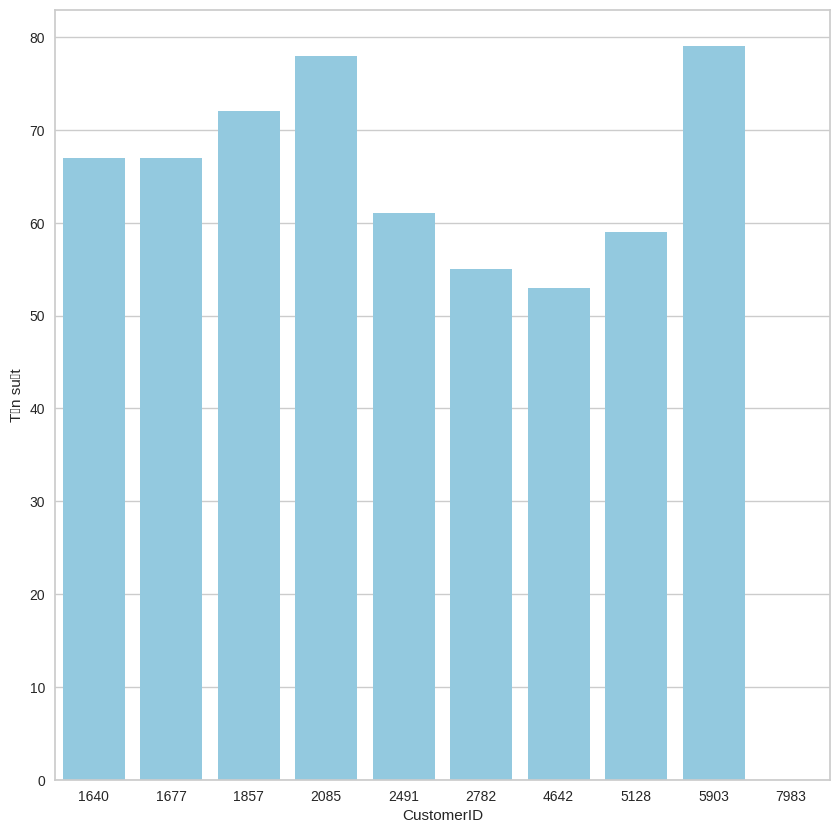

In [215]:
plt.figure(figsize=(10,10))
sns.barplot(data=most_fre_customer.head(10), x='CustomerID', y=most_fre_customer["CustomerID"].value_counts(),  color='skyblue')
plt.ylabel("Tần suất")
plt.show()

In [216]:
most_fre_customer['Quantity'] = df['Quantity']
most_fre_customer['UnitPrice'] = df['UnitPrice']
most_fre_customer['Total_amount_paid'] = most_fre_customer['Quantity']* most_fre_customer['UnitPrice']
top_10_fre_customer = most_fre_customer.sort_values(by='Total_amount_paid', ascending = False).head(10)
top_10_fre_customer

,index,CustomerID,Quantity,UnitPrice,Total_amount_paid
870,16261.0,124,480,3.39,1627.20
2364,12616.0,36,384,2.95,1132.80
178,12451.0,355,192,3.82,733.44
180,14395.0,353,192,3.37,647.04
179,16110.0,354,192,3.37,647.04
181,13985.0,353,432,1.45,626.40
3041,14104.0,21,1,607.49,607.49
2723,14912.0,28,47,12.72,597.84
1814,17703.0,55,1,569.77,569.77
2316,17503.0,38,120,4.65,558.00


In [217]:
top_10_fre_customer['CustomerID'] = top_10_fre_customer['CustomerID'].astype(str)

In [218]:
top_10_fre_customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10 entries, 870 to 2316
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              10 non-null     float64
 1   CustomerID         10 non-null     object 
 2   Quantity           10 non-null     int64  
 3   UnitPrice          10 non-null     float64
 4   Total_amount_paid  10 non-null     float64
dtypes: float64(3), int64(1), object(1)
memory usage: 480.0+ bytes


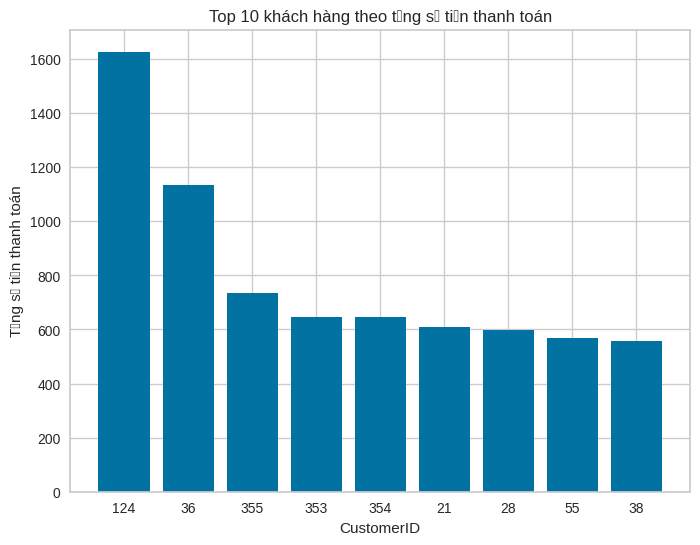

In [219]:
plt.figure(figsize=(8, 6))
plt.bar(data=top_10_fre_customer, x='CustomerID', height='Total_amount_paid')
plt.xlabel('CustomerID')
plt.ylabel('Tổng số tiền thanh toán')
plt.title('Top 10 khách hàng theo tổng số tiền thanh toán')
plt.show()


# Top 10 khách hàng có tổng số tiền thanh toán lớn nhất

In [220]:
df['Total_amount_paid'] = df['Quantity']* df['UnitPrice']
df['Total_amount_paid']

0         15.30
1         20.34
2         22.00
3         20.34
4         20.34
          ...  
541904    10.20
541905    12.60
541906    16.60
541907    16.60
541908    14.85
Name: Total_amount_paid, Length: 541909, dtype: float64

In [221]:
top_10_customer =df[["index",	"CustomerID",	"Quantity",	"UnitPrice", "Total_amount_paid"]].copy()
top_10_customer

,index,CustomerID,Quantity,UnitPrice,Total_amount_paid
0,0,17850.0,6,2.55,15.30
1,1,17850.0,6,3.39,20.34
2,2,17850.0,8,2.75,22.00
3,3,17850.0,6,3.39,20.34
4,4,17850.0,6,3.39,20.34
...,...,...,...,...,...
541904,541904,12680.0,12,0.85,10.20
541905,541905,12680.0,6,2.10,12.60
541906,541906,12680.0,4,4.15,16.60
541907,541907,12680.0,4,4.15,16.60


In [222]:
top_10_customer= top_10_customer.drop_duplicates().sort_values(by='Total_amount_paid',ascending = False).head(10)
top_10_customer['CustomerID'] = top_10_customer['CustomerID'].astype(str)
top_10_customer

,index,CustomerID,Quantity,UnitPrice,Total_amount_paid
540421,540421,16446.0,80995,2.08,168469.60
61619,61619,12346.0,74215,1.04,77183.60
222680,222680,15098.0,60,649.50,38970.00
15017,15017,nan,1,13541.33,13541.33
299982,299982,nan,1,11062.06,11062.06
173382,173382,16029.0,1,8142.75,8142.75
348325,348325,17450.0,1412,5.06,7144.72
160546,160546,15749.0,3114,2.10,6539.40
52711,52711,15749.0,3114,2.10,6539.40
421601,421601,14646.0,2400,2.08,4992.00


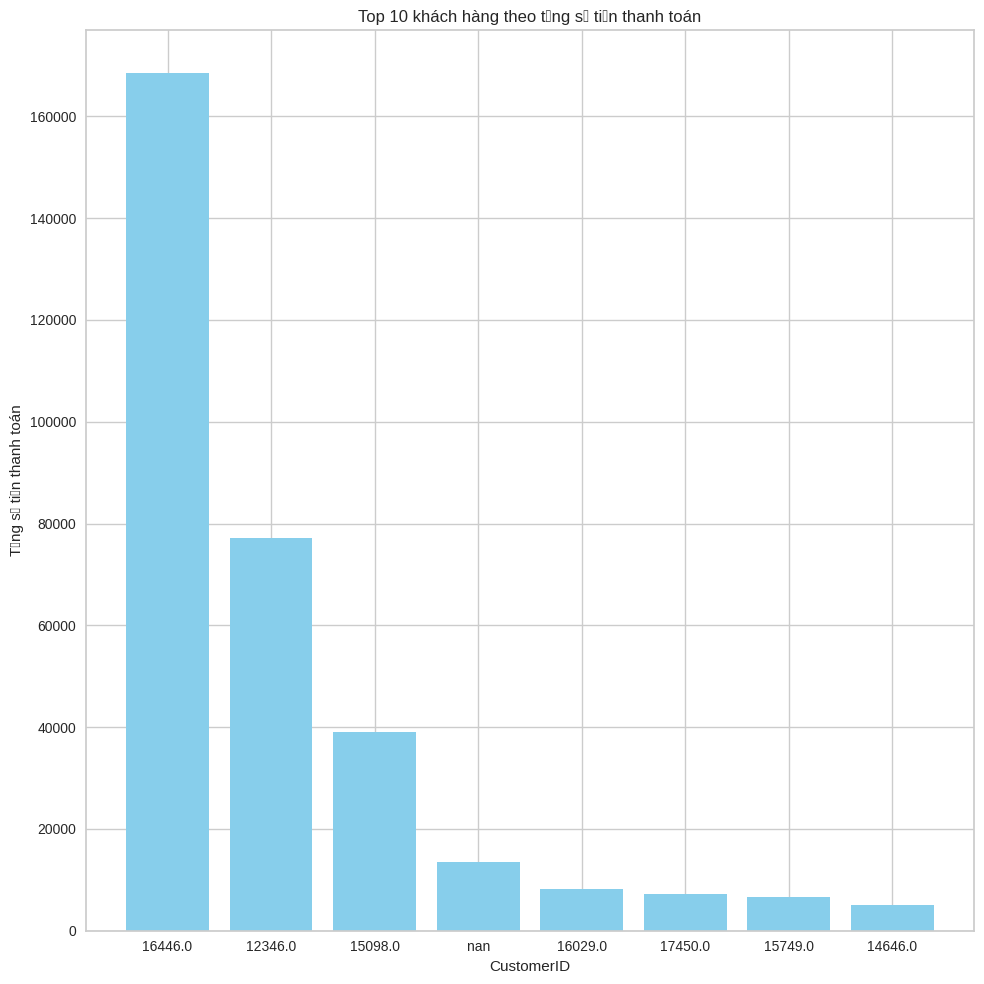

In [223]:
plt.figure(figsize=(10,10))
plt.bar(data =top_10_customer, x='CustomerID', height="Total_amount_paid", color='skyblue')
plt.xlabel('CustomerID')
plt.ylabel('Tổng số tiền thanh toán')
plt.title('Top 10 khách hàng theo tổng số tiền thanh toán')
plt.tight_layout()
plt.show()


# Quốc gia có tổng thanh toán cao nhất

In [224]:
top_country_paid = df[["index",	"CustomerID",	"Quantity",	"UnitPrice", "Country", "Total_amount_paid"]].copy()

In [225]:
top_country_paid = top_country_paid.groupby(by='Country').agg({'Total_amount_paid':'sum'}).sort_values(by='Total_amount_paid', ascending = False).reset_index().head(10)
top_country_paid

,Country,Total_amount_paid
0,United Kingdom,8187806.364
1,Netherlands,284661.540
2,EIRE,263276.820
3,Germany,221698.210
4,France,197403.900
5,Australia,137077.270
6,Switzerland,56385.350
7,Spain,54774.580
8,Belgium,40910.960
9,Sweden,36595.910


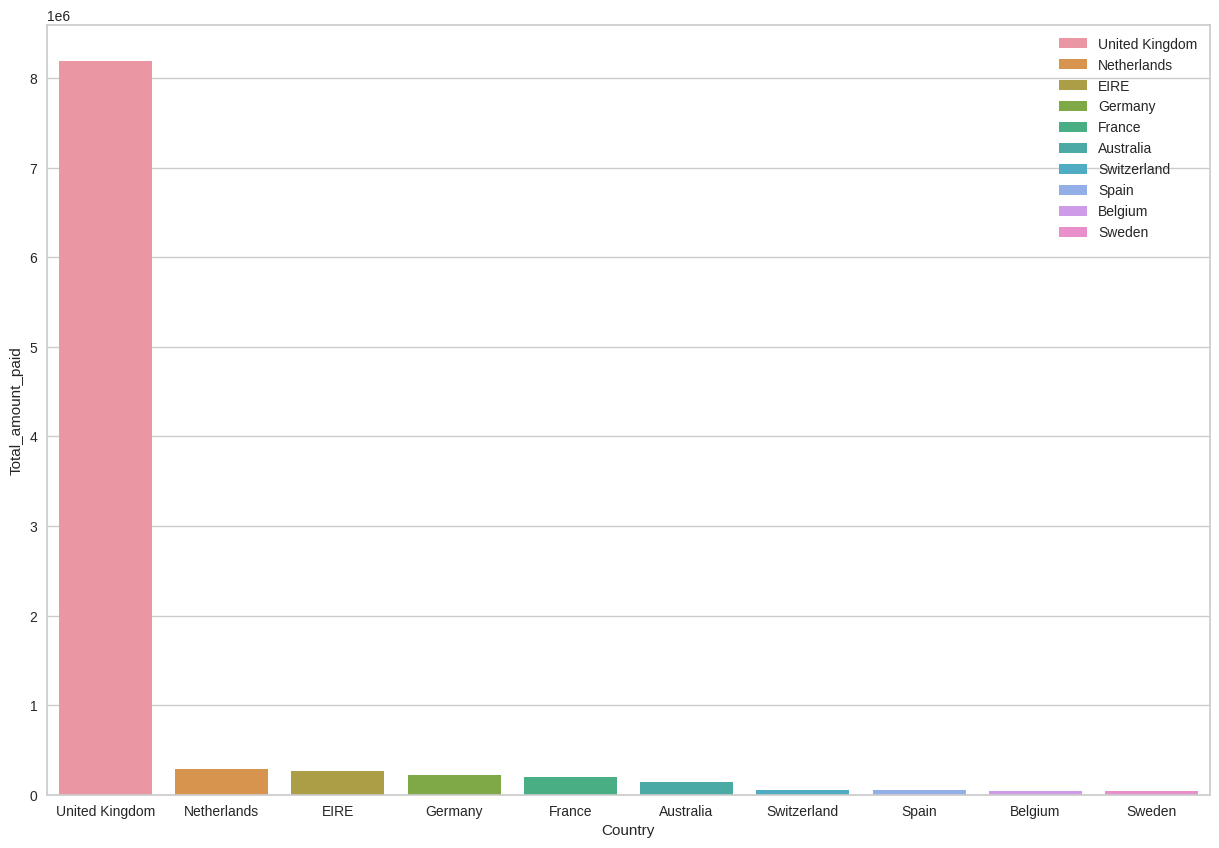

In [226]:
plt.figure(figsize=(15,10))
sns.barplot(data=top_country_paid, x='Country', y='Total_amount_paid', hue='Country',dodge=False)
plt.legend()
plt.show()

In [227]:
df.isnull().sum()

index                     0
InvoiceNo                 0
StockCode                 0
Description            1454
Quantity                  0
InvoiceDate               0
UnitPrice                 0
CustomerID           135080
Country                   0
InvoiceDate_year          0
InvoiceDate_month         0
InvoiceDate_day           0
InvoiceDate_hour          0
Total_amount_paid         0
dtype: int64

In [228]:
df['Description'].fillna("No Description", inplace=True)
df.dropna(subset=['CustomerID'],inplace=True)

In [229]:
df.isnull().sum()

index                0
InvoiceNo            0
StockCode            0
Description          0
Quantity             0
InvoiceDate          0
UnitPrice            0
CustomerID           0
Country              0
InvoiceDate_year     0
InvoiceDate_month    0
InvoiceDate_day      0
InvoiceDate_hour     0
Total_amount_paid    0
dtype: int64

In [230]:
df.shape

(406829, 14)

In [231]:
df1=df.copy()

In [232]:
df1['Total_Sale']=df1['Quantity']*df1['UnitPrice']

In [233]:
df1=df1[df1['Total_Sale']!=0]

In [234]:
df1.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate_year,InvoiceDate_month,InvoiceDate_day,InvoiceDate_hour,Total_amount_paid,Total_Sale
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8,15.30,15.30
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,20.34,20.34
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,8,22.00,22.00
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,20.34,20.34
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,20.34,20.34


In [235]:
round(df1.describe(),2)

,index,Quantity,UnitPrice,CustomerID,InvoiceDate_year,InvoiceDate_month,InvoiceDate_day,InvoiceDate_hour,Total_amount_paid,Total_Sale
count,406789.00,406789.00,406789.00,406789.00,406789.00,406789.00,406789.00,406789.00,406789.00,406789.00
mean,278045.94,12.03,3.46,15287.80,2010.93,7.61,15.04,12.74,20.40,20.40
std,152743.51,247.93,69.32,1713.57,0.25,3.42,8.65,2.28,427.61,427.61
min,0.00,-80995.00,0.00,12346.00,2010.00,1.00,1.00,6.00,-168469.60,-168469.60
25%,147749.00,2.00,1.25,13954.00,2011.00,5.00,7.00,11.00,4.20,4.20
50%,284430.00,5.00,1.95,15152.00,2011.00,8.00,15.00,13.00,11.10,11.10
75%,409523.00,12.00,3.75,16791.00,2011.00,11.00,22.00,14.00,19.50,19.50
max,541908.00,80995.00,38970.00,18287.00,2011.00,12.00,31.00,20.00,168469.60,168469.60


In [236]:
df1["InvoiceDate"] = pd.to_datetime(df1["InvoiceDate"])
df1.dtypes

index                         int64
InvoiceNo                    object
StockCode                    object
Description                  object
Quantity                      int64
InvoiceDate          datetime64[ns]
UnitPrice                   float64
CustomerID                  float64
Country                      object
InvoiceDate_year              int64
InvoiceDate_month             int64
InvoiceDate_day               int64
InvoiceDate_hour              int64
Total_amount_paid           float64
Total_Sale                  float64
dtype: object

In [237]:
df1["Day"] = df1["InvoiceDate"].dt.day
df1["Month"] = df1["InvoiceDate"].dt.month
df1["Year"] = df1["InvoiceDate"].dt.year

In [238]:
df1.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate_year,InvoiceDate_month,InvoiceDate_day,InvoiceDate_hour,Total_amount_paid,Total_Sale,Day,Month,Year
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8,15.30,15.30,1,12,2010
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,20.34,20.34,1,12,2010
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,8,22.00,22.00,1,12,2010
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,20.34,20.34,1,12,2010
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,20.34,20.34,1,12,2010


In [239]:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.01)
    quartile3 = dataframe[variable].quantile(0.99)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return up_limit, low_limit

def replace_with_threshold(dataframe, variable):
    up_limit, low_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
    dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

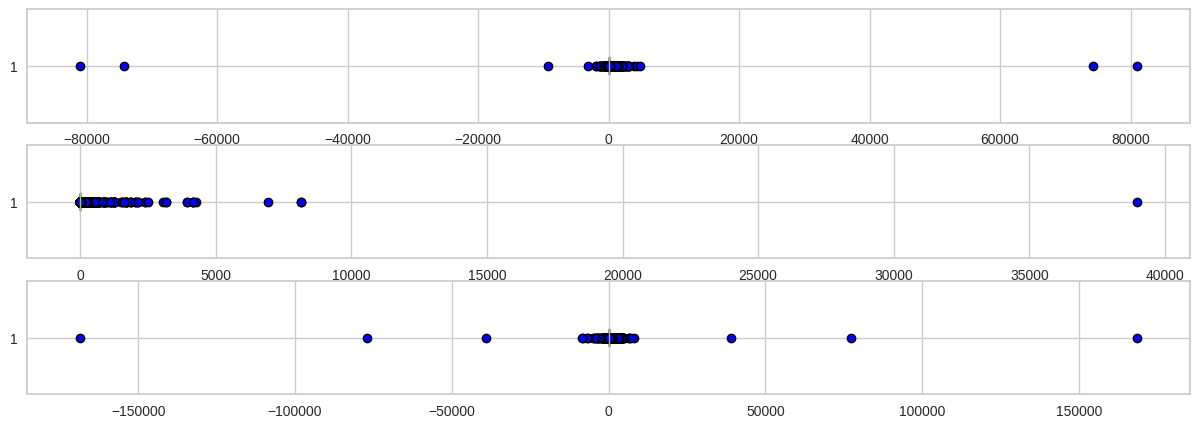

In [240]:
fig, axes = plt.subplots(3,1, figsize = (15,5))
col_list = ["Quantity","UnitPrice","Total_Sale"]
for i in range(0,3):
    axes[i].boxplot(df1[col_list[i]],flierprops = dict(marker = "o", markerfacecolor = "blue"), vert = 0)
plt.show()

In [241]:
replace_with_threshold(df1, "Quantity")
replace_with_threshold(df1, "UnitPrice")
replace_with_threshold(df1, "Total_Sale")

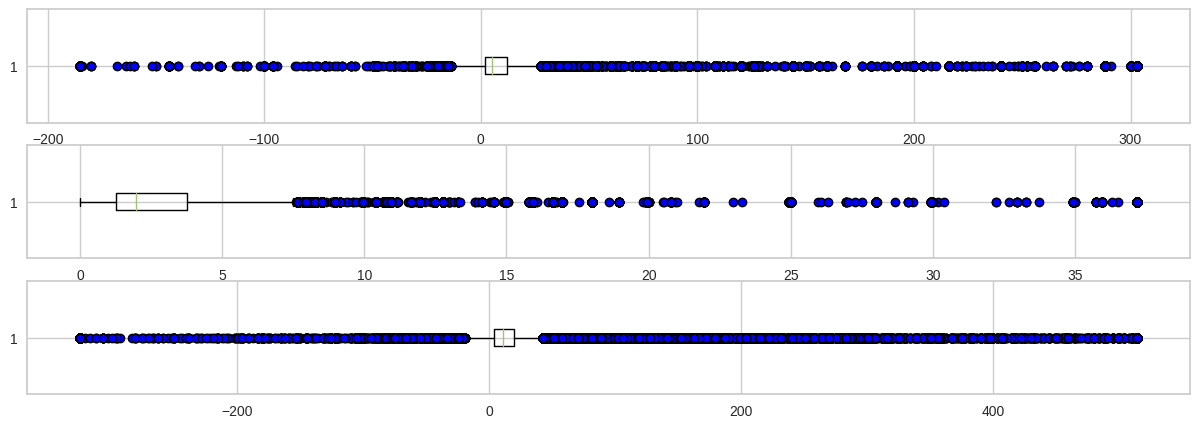

In [242]:
fig, axes = plt.subplots(3,1, figsize = (15,5))
col_list = ["Quantity","UnitPrice","Total_Sale"]
for i in range(0,3):
    axes[i].boxplot(df1[col_list[i]],flierprops = dict(marker = "o", markerfacecolor = "blue"), vert = 0)
plt.show()

#Doanh số trung bình mỗi quốc gia

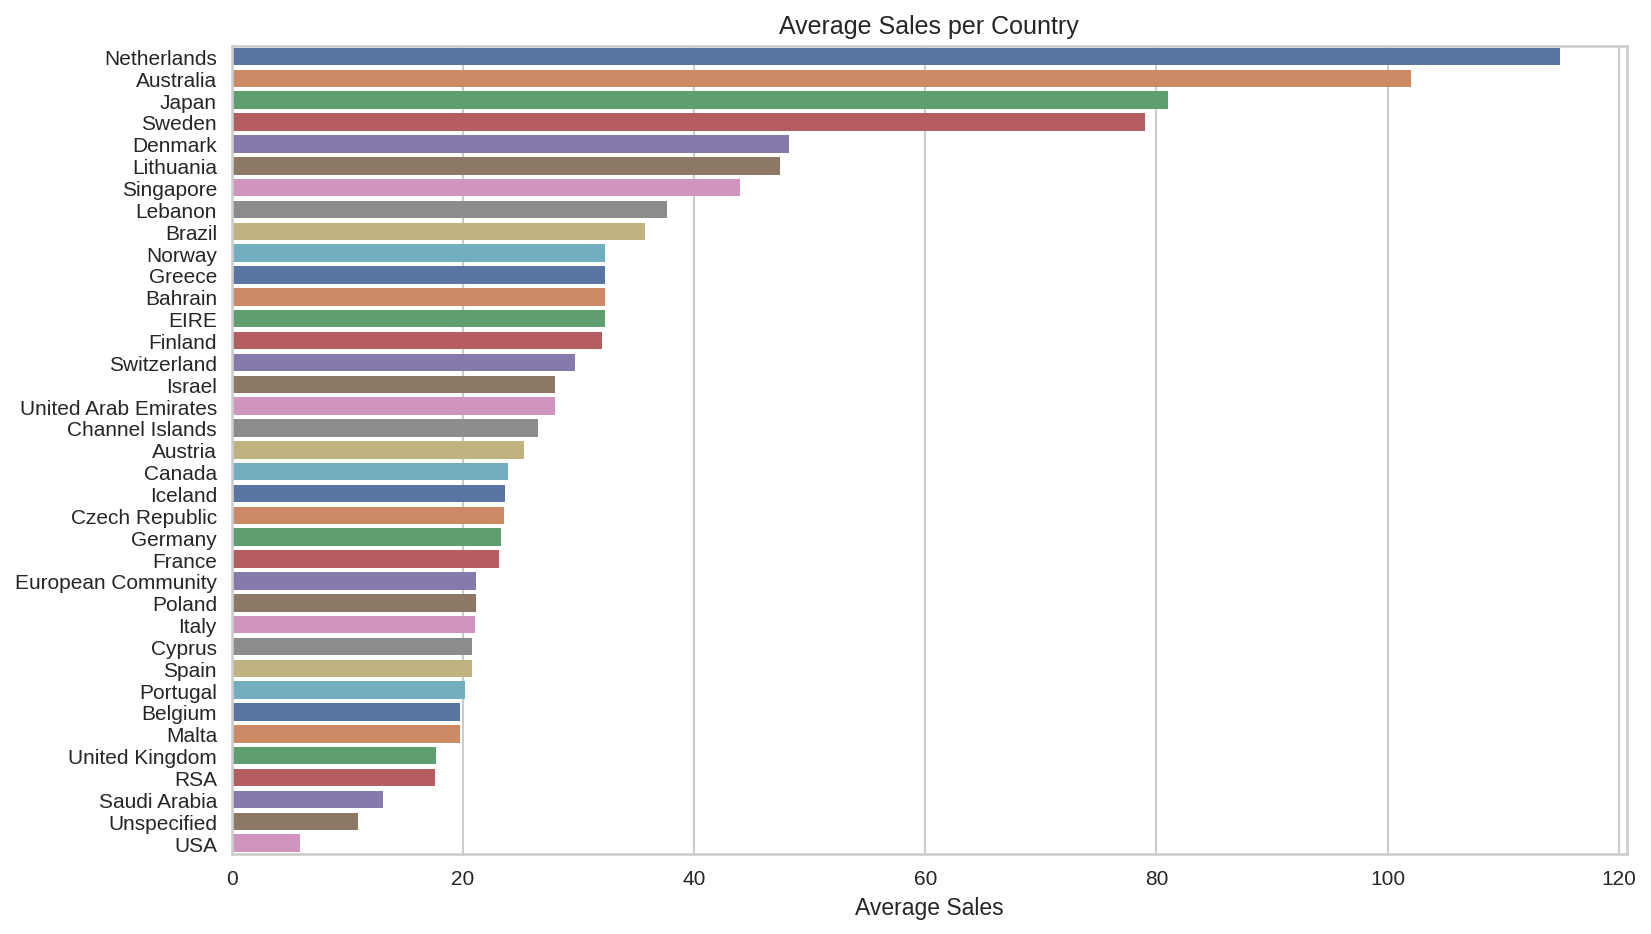

In [243]:
sales_per_country = df1.groupby("Country")["Total_Sale"].mean().sort_values(ascending=False)

plt.figure(figsize = (12, 7), dpi = 150)
sns.barplot(x = sales_per_country.values, y = sales_per_country.index,palette='deep')
plt.xlabel("Average Sales")
plt.ylabel("")
plt.title("Average Sales per Country");

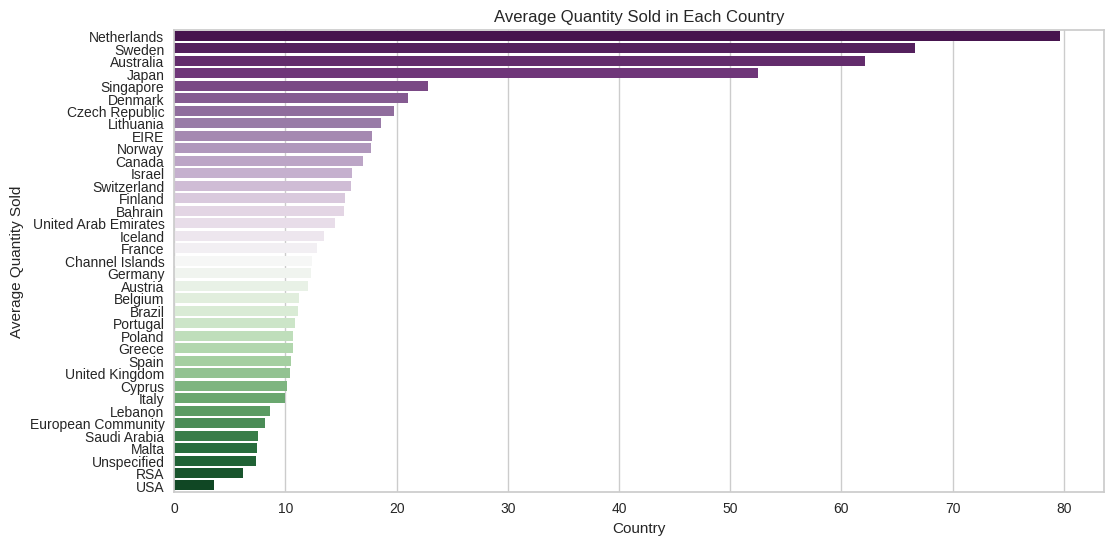

In [244]:
avg_quantity_by_country = df1.groupby('Country')['Quantity'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(x=avg_quantity_by_country.values,y=avg_quantity_by_country.index,palette='PRGn')
plt.title('Average Quantity Sold in Each Country')
plt.xlabel('Country')
plt.ylabel('Average Quantity Sold')
plt.show()

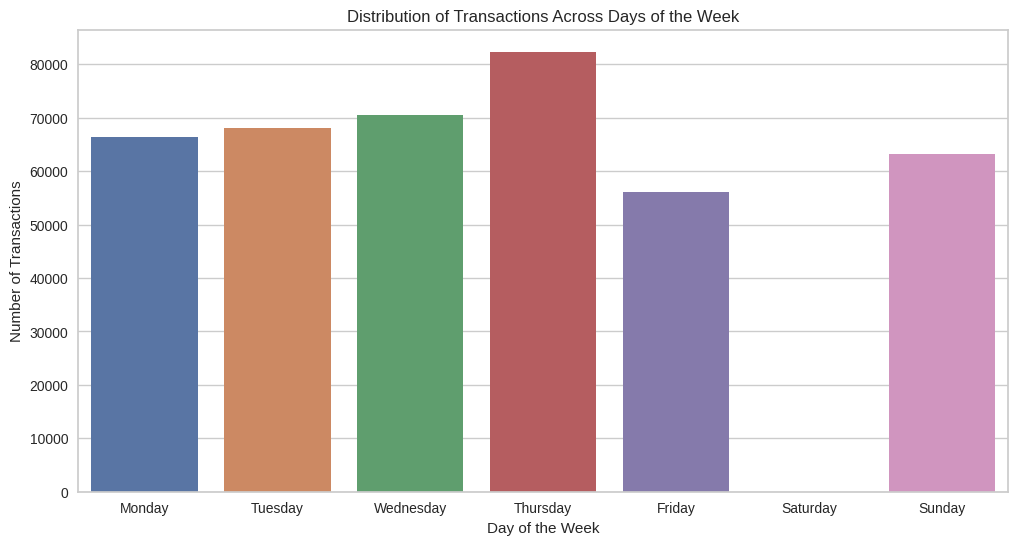

In [245]:
df1['DayOfWeek'] = df1['InvoiceDate'].dt.day_name()
plt.figure(figsize=(12, 6))
sns.countplot(x='DayOfWeek', data=df1, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='deep')
plt.title('Distribution of Transactions Across Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Transactions')
plt.show()

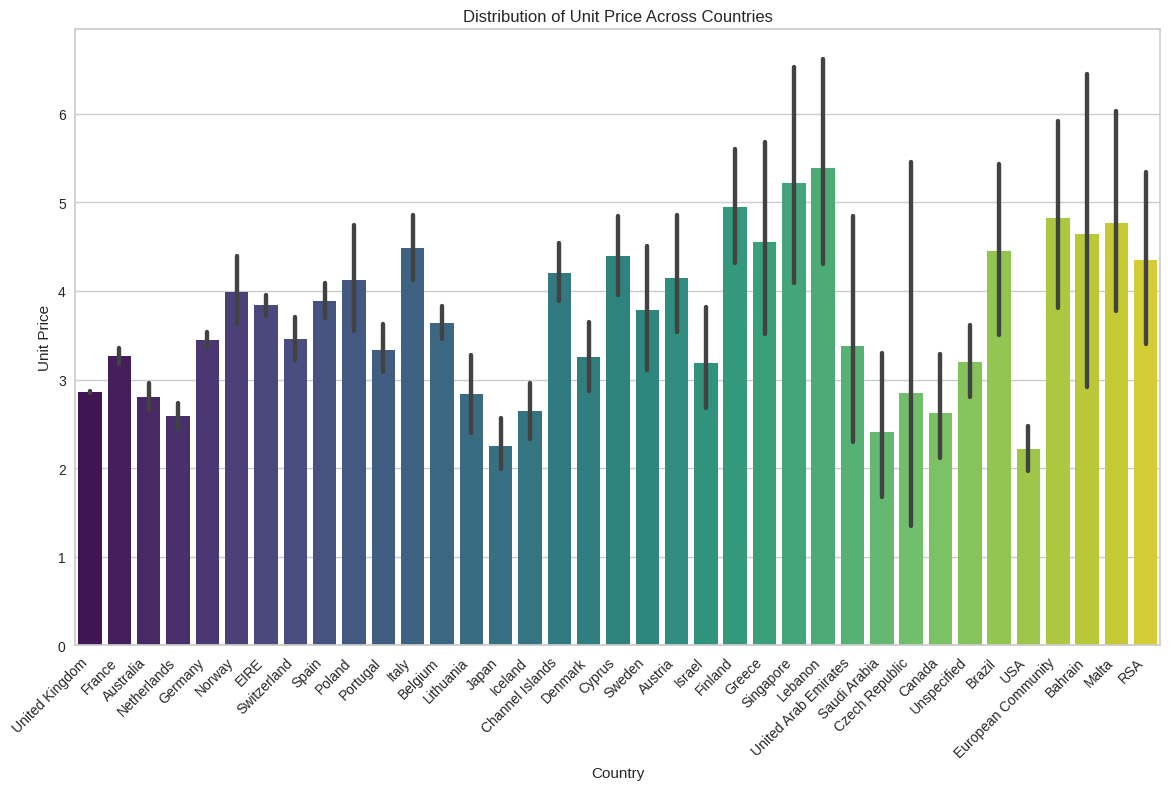

In [246]:
plt.figure(figsize=(14, 8))
sns.barplot(x='Country', y='UnitPrice', data=df1, palette='viridis')
plt.title('Distribution of Unit Price Across Countries')
plt.xlabel('Country')
plt.ylabel('Unit Price')
plt.xticks(rotation=45, ha='right')
plt.show()

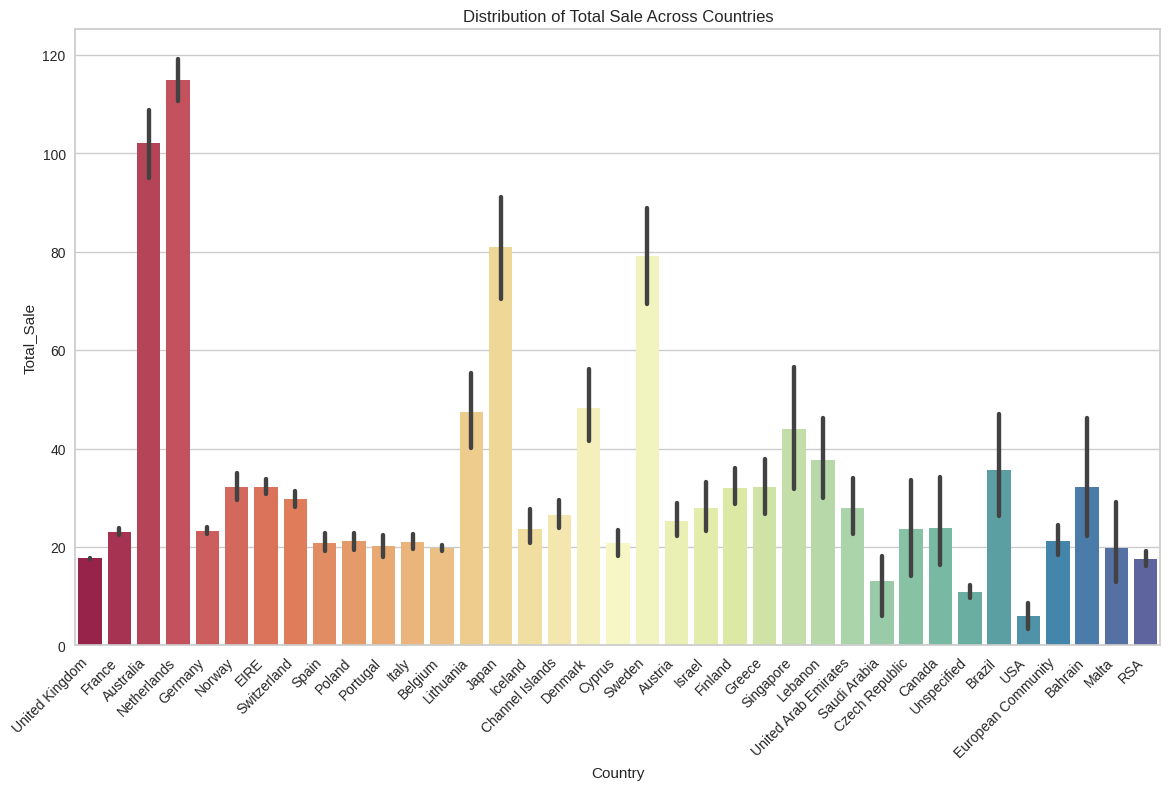

In [247]:
plt.figure(figsize=(14, 8))
sns.barplot(x='Country', y='Total_Sale', data=df1, palette='Spectral')
plt.title('Distribution of Total Sale Across Countries')
plt.xlabel('Country')
plt.ylabel('Total_Sale')
plt.xticks(rotation=45, ha='right')
plt.show()

In [248]:
print("Max date :",df1["InvoiceDate"].max())
print("Min date :",df1["InvoiceDate"].min())

Max date : 2011-12-09 12:50:00
Min date : 2010-12-01 08:26:00


In [249]:
df1.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceDate_year,InvoiceDate_month,InvoiceDate_day,InvoiceDate_hour,Total_amount_paid,Total_Sale,Day,Month,Year,DayOfWeek
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,8,15.30,15.30,1,12,2010,Wednesday
1,1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,20.34,20.34,1,12,2010,Wednesday
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,8,22.00,22.00,1,12,2010,Wednesday
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,20.34,20.34,1,12,2010,Wednesday
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,8,20.34,20.34,1,12,2010,Wednesday


#Dự đoán việc giao dịch có tính chất gian lận hay không

In [250]:
from sklearn.metrics import accuracy_score
import tensorflow as tf

In [251]:
data = pd.read_csv('online_retail.csv')

In [252]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   index        541909 non-null  int64  
 1   InvoiceNo    541909 non-null  object 
 2   StockCode    541909 non-null  object 
 3   Description  540455 non-null  object 
 4   Quantity     541909 non-null  int64  
 5   InvoiceDate  541909 non-null  object 
 6   UnitPrice    541909 non-null  float64
 7   CustomerID   406829 non-null  float64
 8   Country      541909 non-null  object 
dtypes: float64(2), int64(2), object(5)
memory usage: 37.2+ MB


In [253]:
data.shape

(541909, 9)

In [254]:
data.isnull().sum()

index               0
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [255]:
unique_descriptions =  data['Description'].value_counts()
unique_descriptions

WHITE HANGING HEART T-LIGHT HOLDER     2369
REGENCY CAKESTAND 3 TIER               2200
JUMBO BAG RED RETROSPOT                2159
PARTY BUNTING                          1727
LUNCH BAG RED RETROSPOT                1638
                                       ... 
Missing                                   1
historic computer difference?....se       1
DUSTY PINK CHRISTMAS TREE 30CM            1
WRAP BLUE RUSSIAN FOLKART                 1
PINK BERTIE MOBILE PHONE CHARM            1
Name: Description, Length: 4223, dtype: int64

In [256]:
data = data.drop("CustomerID", axis=1)
data.head()

,index,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,Country
0,0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,United Kingdom
1,1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,United Kingdom
2,2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,United Kingdom
3,3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,United Kingdom
4,4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,United Kingdom


In [257]:
data['Description'].fillna("No Description", inplace=True)
data.isnull().sum()

index          0
InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
Country        0
dtype: int64

In [258]:
data['is_fraud'] = data['Quantity'].apply(lambda x: 1 if x > 100 else 0)

In [259]:
X = data.drop('is_fraud', axis=1)
y = data['is_fraud']

In [260]:
encoder = LabelEncoder()
for col in X.select_dtypes(include='object').columns:
    X[col] = encoder.fit_transform(X[col])

In [261]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [262]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [263]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [264]:
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
13548/13548 [==============================] - 57s 4ms/step - loss: 32.0160 - accuracy: 0.9860 - val_loss: 0.4015 - val_accuracy: 0.9840
Epoch 2/10
13548/13548 [==============================] - 52s 4ms/step - loss: 0.6128 - accuracy: 0.9918 - val_loss: 0.0358 - val_accuracy: 0.9947
Epoch 3/10
13548/13548 [==============================] - 57s 4ms/step - loss: 0.0395 - accuracy: 0.9930 - val_loss: 0.0430 - val_accuracy: 0.9923
Epoch 4/10
13548/13548 [==============================] - 56s 4ms/step - loss: 0.0732 - accuracy: 0.9909 - val_loss: 0.0510 - val_accuracy: 0.9910
Epoch 5/10
13548/13548 [==============================] - 52s 4ms/step - loss: 0.0507 - accuracy: 0.9912 - val_loss: 0.0497 - val_accuracy: 0.9912
Epoch 6/10
13548/13548 [==============================] - 53s 4ms/step - loss: 0.0419 - accuracy: 0.9925 - val_loss: 0.0460 - val_accuracy: 0.9916
Epoch 7/10
13548/13548 [==============================] - 53s 4ms/step - loss: 0.0301 - accuracy: 0.9943 - val_loss: 

In [265]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

3387/3387 [==============================] - 8s 2ms/step - loss: 0.0163 - accuracy: 0.9965
Test Accuracy: 99.65%
